### REXEL TECHNICAL USE CASE 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
train_df=pd.read_csv("training.csv")
validation_df=pd.read_csv("validation.csv")

In [3]:
train_df.shape,validation_df.shape

((11981, 19), (3993, 18))

we will remove the CHURNED DATA to avoid encoding NAN 

In [4]:
train_df_=train_df.drop('CHURNED', axis=1)

In [5]:
train_df_.shape,validation_df.shape

((11981, 18), (3993, 18))

we will concatenate the training and valisation data in purpose to obtain an homogeneous encoding of string label data

In [6]:
df=pd.merge(train_df_,validation_df,how='outer')
df.shape

(15974, 18)

so now, we have train_df at the top of df and test_df at the bottom of df

#### Utility Functions for cleaning data

In [7]:
def label_encoding (df:pd.DataFrame)->pd.DataFrame:
    df['COLLEGE']=df['COLLEGE'].astype('category')
    df['COLLEGE']=df['COLLEGE'].cat.codes 
    df["LESSTHAN600k"]=  df["LESSTHAN600k"].astype('category')
    df["LESSTHAN600k"]=df["LESSTHAN600k"].cat.codes
    df["CONSIDERING_CHANGE_OF_PLAN"]= df["CONSIDERING_CHANGE_OF_PLAN"].astype('category')
    df["CONSIDERING_CHANGE_OF_PLAN"]=df["CONSIDERING_CHANGE_OF_PLAN"].cat.codes
    df['REPORTED_USAGE_LEVEL']=df['REPORTED_USAGE_LEVEL'].astype('category')
    df['REPORTED_USAGE_LEVEL']=df['REPORTED_USAGE_LEVEL'].cat.codes
    df['REPORTED_SATISFACTION']=df['REPORTED_SATISFACTION'].astype('category')
    df['REPORTED_SATISFACTION']=df['REPORTED_SATISFACTION'].cat.codes
    return df
def data_cleaning(df:pd.DataFrame)->pd.DataFrame:
    cleaned_train_df=df.drop('CUSTOMER_ID', axis=1)
    cleaned_train_df=cleaned_train_df.drop_duplicates()
    cleaned_train_df= cleaned_train_df.dropna()
    return cleaned_train_df

In [8]:
label_encoded_df=label_encoding(df)

In [9]:
label_encoded_df.shape

(15974, 18)

In [10]:
train_df__=label_encoded_df.iloc[0:11981].reset_index().drop('index', axis=1)
validation_df__=label_encoded_df.iloc[11981:15975].reset_index().drop('index', axis=1)

In [11]:
train_df__.shape,validation_df__.shape

((11981, 18), (3993, 18))

In [12]:
train_df__['CHURNED']=train_df['CHURNED']
train_df__['CHURNED']=train_df__['CHURNED'].astype('category')

In [13]:
train_df__["CHURNED"] = train_df__["CHURNED"].map({'STAY': 0, 'LEAVE': 1})

In [14]:
cleaned_train_df=data_cleaning(train_df__)
cleaned_test_df=data_cleaning(validation_df__)

In [15]:
cleaned_train_df['CHURNED'].count()

11346

In [16]:
cleaned_train_df['CHURNED'].value_counts() 

0    7201
1    4145
Name: CHURNED, dtype: int64

balanced or unbalanced data 
63% of data is labaled as stay and 37 % is labaled as leave 
it seems like a fair balanced data 

### Data Visualisation 

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'HOUSE'),
  Text(1.5, 0, 'LESSTHAN600k'),
  Text(2.5, 0, 'OVER_15MINS_CALLS_PER_MONTH'),
  Text(3.5, 0, 'OVERCHARGE')])

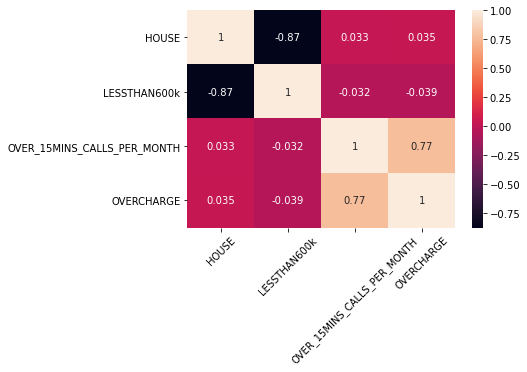

In [18]:
corr=cleaned_train_df[['HOUSE','LESSTHAN600k','OVER_15MINS_CALLS_PER_MONTH','OVERCHARGE']].corr()
sns.heatmap(corr, annot=True)
plt.xticks(rotation=45)

As we can notice, "HOUSE" and "LESSTHAN600k" are highly corraleted (more than .7). Same thing between 'OVER_15MINS_CALLS_PER_MONTH' and 'OVERCHARGE' 

In [19]:
cleaned_train_df_=cleaned_train_df.drop(["LESSTHAN600k",'OVERCHARGE'], axis=1)
cleaned_validation_df_=cleaned_test_df.drop(["LESSTHAN600k",'OVERCHARGE'], axis=1)

In [20]:
# CORRELATION ANALYSIS WITH THE TARGET VARIABLE 
cleaned_train_df.corrwith(cleaned_train_df["CHURNED"]).sort_values(ascending=False)

LESSTHAN600k                   0.236807
OVERCHARGE                     0.213853
OVER_15MINS_CALLS_PER_MONTH    0.192262
INCOME                         0.168192
HANDSET_PRICE                  0.078973
REPORTED_SATISFACTION          0.068036
LEFTOVER                       0.063036
DATA                           0.054578
REVENUE                        0.011884
REPORTED_USAGE_LEVEL           0.004082
CHILD                         -0.002415
COLLEGE                       -0.006694
JOB_CLASS                     -0.010538
TIME_CLIENT                   -0.013717
AVERAGE_CALL_DURATION         -0.017899
CONSIDERING_CHANGE_OF_PLAN    -0.094736
HOUSE                         -0.197716
dtype: float64

### standardization of numerical variables 

In [22]:
cat_cols_train=['COLLEGE', 'JOB_CLASS','REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN','CHURNED']
train_df_cat=cleaned_train_df_[cat_cols_train]
train_df_num=cleaned_train_df_.drop(cat_cols_train,axis=1)

In [23]:
train_df_cat.values

array([[1, 3, 4, 2, 1, 0],
       [0, 1, 2, 2, 1, 1],
       [1, 2, 0, 4, 1, 0],
       ...,
       [1, 1, 2, 2, 0, 1],
       [1, 1, 4, 2, 1, 0],
       [0, 4, 4, 2, 4, 0]], dtype=int64)

In [27]:
cat_cols_validation=['COLLEGE', 'JOB_CLASS','REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
validation_df_cat=cleaned_validation_df_[cat_cols_validation]
validation_df_num=cleaned_validation_df_.drop(cat_cols_validation,axis=1)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler().fit(train_df_num)

In [30]:
train_df_num_stand= scaler.transform(train_df_num)
validation_df_num_stand = scaler.transform(validation_df_num)

In [31]:
validation_df_num_stand.shape

(3794, 10)

In [32]:
validation_df_cat.values.shape

(3794, 5)

In [33]:
train_data=np.concatenate((train_df_num_stand,train_df_cat.values), axis=1)

In [34]:
validation_data=np.concatenate((validation_df_num_stand,validation_df_cat.values), axis=1)

In [35]:
train_data.shape==cleaned_train_df_.shape

True

In [36]:
validation_data.shape==cleaned_validation_df_.shape

True

### Modeling and Testing 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve

In [38]:
Y=train_data[:,15]

In [39]:
X=train_data[:,0:15]

In [40]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=30)

##### LOGISTIC REGRESSION CLASSIFIER 

In [74]:
model_1=LogisticRegression(penalty='l2', random_state=0) 
model_1.fit(x_train,y_train)
y_pred_1=model_1.predict_proba(x_test)
score_roc_auc_1=roc_auc_score(y_test,y_pred_1[:,1])
print('The ROC AUC score of the Logistic Regression classifier model is {}'.format(score_roc_auc_1))

The ROC AUC score of the Logistic Regression classifier model is 0.625


##### RANDOM FOREST CLASSIFIER 

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [70]:
model_2=RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,random_state =65)
model_2.fit (x_train,y_train)
y_pred_2=model_2.predict_proba(x_test)
score_roc_auc_2=roc_auc_score(y_test,y_pred_2[:,1])
print('The ROC AUC score of the random forest classifier model is {}'.format(score_roc_auc_2))

The ROC AUC score of the random forest classifier model is 0.785


Text(0.5, 1.0, 'Confusion Matrix Random Forest')

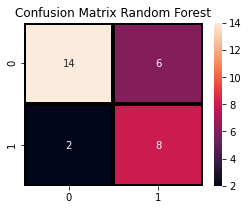

In [71]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, model_2.predict(x_test)),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("Confusion Matrix Random Forest")

##### ADABOOST CLASSIFIER 

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
model_3= AdaBoostClassifier()
model_3.fit (x_train,y_train)
y_pred_3=model_3.predict_proba(x_test)
score_roc_auc_3=roc_auc_score(y_test,y_pred_3[:,1])
print('The ROC AUC score of the AdaBoost classifier model is {}'.format(score_roc_auc_3))

The ROC AUC score of the AdaBoost classifier model is 0.75


##### XGBOOST CLASSIFIER

In [62]:
from xgboost import XGBClassifier

In [63]:
model_4= XGBClassifier()
model_4.fit (x_train,y_train)
y_pred_4=model_4.predict_proba(x_test)
score_roc_auc_4=roc_auc_score(y_test,y_pred_4[:,1])
print('The ROC AUC score of the AdaBoost classifier model is {}'.format(score_roc_auc_4))

The ROC AUC score of the AdaBoost classifier model is 0.8


##### ROC Curve: visual inspection 

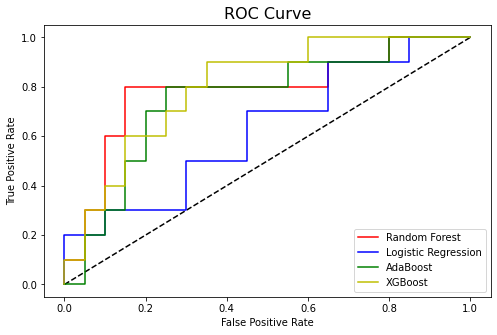

In [173]:
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_2[:,1])
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_pred_1[:,1])
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_3[:,1])
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_4[:,1])

plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest',color = "r")
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression',color = "b")
plt.plot(fpr_ada, tpr_ada, label='AdaBoost',color = "g")
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost',color = "y")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',fontsize=16)
plt.legend()

##### Use of XGBoost on validation data because it has the highest ROC AUC 

In [96]:
validation_pred= model_4.predict(validation_data)
validation_proba_pred_=model_4.predict_proba(validation_data)
validation_proba_churn=validation_proba_pred_[:,1]

In [101]:
validation_proba_churn.reshape(3794,1)

array([[0.7447745 ],
       [0.6133875 ],
       [0.06376301],
       ...,
       [0.13336878],
       [0.5577387 ],
       [0.01429389]], dtype=float32)

In [100]:
validation_pred.shape

(3794,)

In [102]:
validation_pred_churn=np.concatenate((validation_pred.reshape(3794,1),validation_proba_churn.reshape(3794,1)), axis=1)

In [105]:
validation_df['CUSTOMER_ID'].values

array(['C100002', 'C100003', 'C100004', ..., 'C115962', 'C115969',
       'C115971'], dtype=object)

In [108]:
validation_pred_churn.shape

(3794, 2)

In [111]:
customer_id=validation_df.drop_duplicates().dropna()['CUSTOMER_ID'].values.reshape(3794,1)

In [112]:
validation_pred_churn_=np.concatenate((validation_pred_churn,customer_id), axis=1)

In [116]:
validation_pred_churn_

array([[1.0, 0.7447745203971863, 'C100002'],
       [1.0, 0.6133875250816345, 'C100003'],
       [0.0, 0.06376301497220993, 'C100004'],
       ...,
       [0.0, 0.13336877524852753, 'C115962'],
       [1.0, 0.557738721370697, 'C115969'],
       [0.0, 0.014293886721134186, 'C115971']], dtype=object)

In [126]:
L=[]
for e in validation_pred_churn_:
    H=[e[2],float(e[1]),int(e[0])]
    L.append(H)
validation_pred_churn__=L

In [153]:
pred_df=pd.DataFrame(validation_pred_churn__, columns=['CUSTOMER_ID','CHURN_PROBABILITY','CHURN_LABEL'])
pred_df.head()

CUSTOMER_ID  CHURN_PROBABILITY  CHURN_LABEL
0     C100002           0.744775            1
1     C100003           0.613388            1
2     C100004           0.063763            0
3     C100005           0.183645            0
4     C100007           0.002451            0

In [154]:
for i in pred_df.index:
    if pred_df.iloc[i,2]==0:
        pred_df.iloc[i,2]='STAY'
    if pred_df.iloc[i,2]==1:
        pred_df.iloc[i,2]='LEAVE'   

In [157]:
pred_df.head()

CUSTOMER_ID  CHURN_PROBABILITY CHURN_LABEL
0     C100002           0.744775       LEAVE
1     C100003           0.613388       LEAVE
2     C100004           0.063763        STAY
3     C100005           0.183645        STAY
4     C100007           0.002451        STAY

In [161]:
pred_df[pred_df['CHURN_PROBABILITY']>0.75].shape

(630, 3)

In [174]:
L=[]
for i in pred_df.index:
    if pred_df.iloc[i,1]>=0.70:             #GIVEN RISK OF XGBOOST OF 20% 
        L.append('YES')
    else:
        L.append('NO')
pred_df['CLIENT_TO_CONTACT']=L

In [178]:
pred_df.head(5)

CUSTOMER_ID  CHURN_PROBABILITY CHURN_LABEL CLIENT_TO_CONTACT DISCOUNT
0     C100002           0.744775       LEAVE               YES      20%
1     C100003           0.613388       LEAVE                NO       0%
2     C100004           0.063763        STAY                NO       0%
3     C100005           0.183645        STAY                NO       0%
4     C100007           0.002451        STAY                NO       0%

In [176]:
L=[]
# tresholds are set given churn marketing literature, see the link provided at the end of the notebook 
for i in pred_df.index:
    if pred_df.iloc[i,1]>=0.70 and pred_df.iloc[i,1]<0.80:
        L.append('20%')
    if pred_df.iloc[i,1]>=0.80 and pred_df.iloc[i,1]<0.90:
        L.append('25%')
    if pred_df.iloc[i,1]>=0.90: 
        L.append('30%')
    if pred_df.iloc[i,1]<0.70:
        L.append('0%')
pred_df['DISCOUNT']=L

In [177]:
pred_df.head(5)

CUSTOMER_ID  CHURN_PROBABILITY CHURN_LABEL CLIENT_TO_CONTACT DISCOUNT
0     C100002           0.744775       LEAVE               YES      20%
1     C100003           0.613388       LEAVE                NO       0%
2     C100004           0.063763        STAY                NO       0%
3     C100005           0.183645        STAY                NO       0%
4     C100007           0.002451        STAY                NO       0%

In [179]:
pred_df.to_csv('churn_predictions.csv')

Link to marketing discount treshold in churn problem:  https://www.kameleoon.com/en/blog/reduce-churn-rate

                                            ###### END ####### 